In [1]:
!wget https://raw.githubusercontent.com/salemprakash/EDA/main/Data/stars%20type.csv

--2024-11-06 04:06:10--  https://raw.githubusercontent.com/salemprakash/EDA/main/Data/stars%20type.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 8233 (8.0K) [text/plain]
Saving to: ‘stars type.csv’

stars type.csv      100%[===================>]   8.04K  --.-KB/s    in 0s      

2024-11-06 04:06:11 (80.3 MB/s) - ‘stars type.csv’ saved [8233/8233]



In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Load the dataset
df = pd.read_csv('stars type.csv')

# Dimension
print("Dataset Dimensions:")
print(df.shape)

# Summary
print("\nDataset Summary:")
print(df.info())

print("\nNumeric Columns Summary Statistics:")
print(df.describe())

print(df.head())

Dataset Dimensions:
(240, 7)

Dataset Summary:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Temperature (K)         240 non-null    int64  
 1   Luminosity(L/Lo)        240 non-null    object 
 2   Radius(R/Ro)            240 non-null    float64
 3   Absolute magnitude(Mv)  240 non-null    float64
 4   Star type               240 non-null    int64  
 5   Star color              237 non-null    object 
 6   Spectral Class          240 non-null    object 
dtypes: float64(2), int64(2), object(3)
memory usage: 13.2+ KB
None

Numeric Columns Summary Statistics:
       Temperature (K)  Radius(R/Ro)  Absolute magnitude(Mv)   Star type
count       240.000000    240.000000              240.000000  240.000000
mean      10497.462500    237.157781                4.382396    2.500000
std        9552.425037    517.155763            

In [3]:
# Data Handling and Cleaning

# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())

# Replace '?' with NaN
df = df.replace('?', np.nan)


Missing Values:
Temperature (K)           0
Luminosity(L/Lo)          0
Radius(R/Ro)              0
Absolute magnitude(Mv)    0
Star type                 0
Star color                3
Spectral Class            0
dtype: int64


In [4]:
# Convert columns to appropriate data types
numeric_columns = ['Temperature (K)', 'Luminosity(L/Lo)', 'Radius(R/Ro)', 'Absolute magnitude(Mv)']
for col in numeric_columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')

df['Star type'] = pd.to_numeric(df['Star type'], errors='coerce')

# Check for missing values after conversion
print("\nMissing Values after conversion:")
print(df.isnull().sum())


Missing Values after conversion:
Temperature (K)           0
Luminosity(L/Lo)          1
Radius(R/Ro)              0
Absolute magnitude(Mv)    0
Star type                 0
Star color                3
Spectral Class            3
dtype: int64


In [5]:
# Handle missing values
# For numeric columns, we'll use median imputation
for col in numeric_columns:
    df[col].fillna(df[col].median(), inplace=True)

# For 'Star type', we'll use mode imputation
df['Star type'].fillna(df['Star type'].mode()[0], inplace=True)

# For 'Star color' and 'Spectral Class', we'll use forward fill
df['Star color'].ffill()
df['Spectral Class'].ffill()

# Check for missing values after imputation
print("\nMissing Values after imputation:")
print(df.isnull().sum())


Missing Values after imputation:
Temperature (K)           0
Luminosity(L/Lo)          0
Radius(R/Ro)              0
Absolute magnitude(Mv)    0
Star type                 0
Star color                3
Spectral Class            3
dtype: int64


<ipython-input-5-135899873e1e>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)
<ipython-input-5-135899873e1e>:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'd

In [6]:
# Check for duplicates
print("\nDuplicate Rows:")
print(df.duplicated().sum())

# Display updated summary
print("\nUpdated Dataset Summary:")
print(df.info())

print("\nUpdated Numeric Columns Summary Statistics:")
print(df.describe())


Duplicate Rows:
0

Updated Dataset Summary:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Temperature (K)         240 non-null    int64  
 1   Luminosity(L/Lo)        240 non-null    float64
 2   Radius(R/Ro)            240 non-null    float64
 3   Absolute magnitude(Mv)  240 non-null    float64
 4   Star type               240 non-null    int64  
 5   Star color              237 non-null    object 
 6   Spectral Class          237 non-null    object 
dtypes: float64(3), int64(2), object(2)
memory usage: 13.2+ KB
None

Updated Numeric Columns Summary Statistics:
       Temperature (K)  Luminosity(L/Lo)  Radius(R/Ro)  \
count       240.000000        240.000000    240.000000   
mean      10497.462500     105721.695201    237.157781   
std        9552.425037     178860.499665    517.155763   
min        1939.000000       

<Figure size 1500x1000 with 0 Axes>

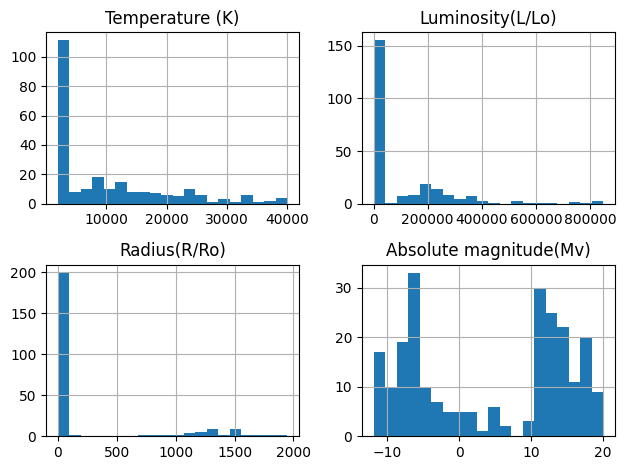

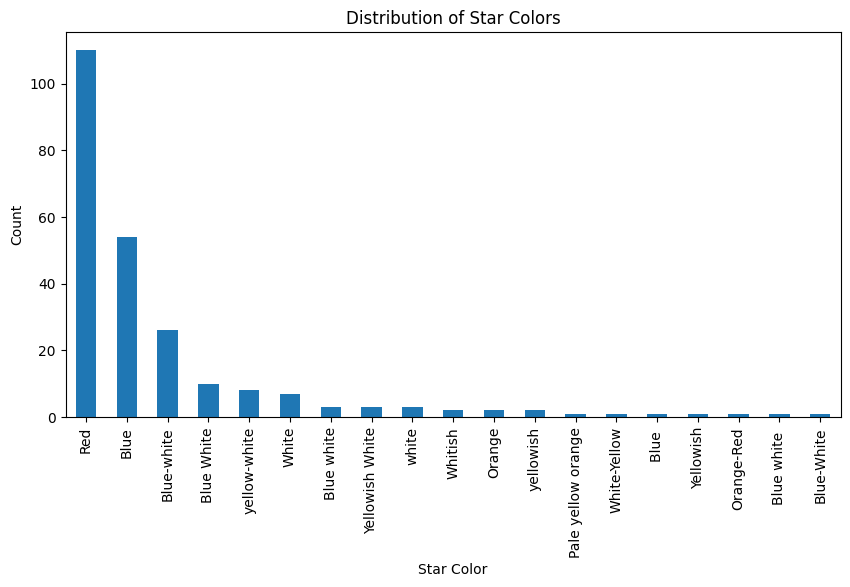

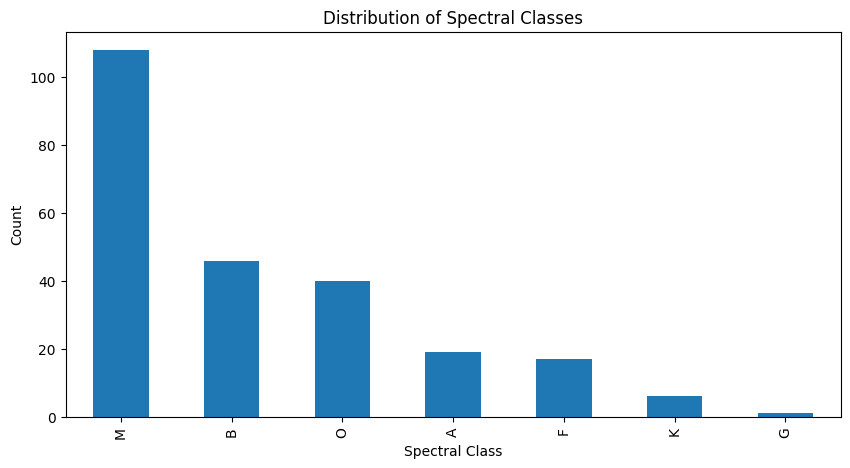

In [7]:
# Univariate Analysis

# Histogram for numerical variables
plt.figure(figsize=(15, 10))
df[numeric_columns].hist(bins=20)
plt.tight_layout()
plt.show()

# Bar plot for categorical variables
plt.figure(figsize=(10, 5))
df['Star color'].value_counts().plot(kind='bar')
plt.title('Distribution of Star Colors')
plt.xlabel('Star Color')
plt.ylabel('Count')
plt.show()

plt.figure(figsize=(10, 5))
df['Spectral Class'].value_counts().plot(kind='bar')
plt.title('Distribution of Spectral Classes')
plt.xlabel('Spectral Class')
plt.ylabel('Count')
plt.show()

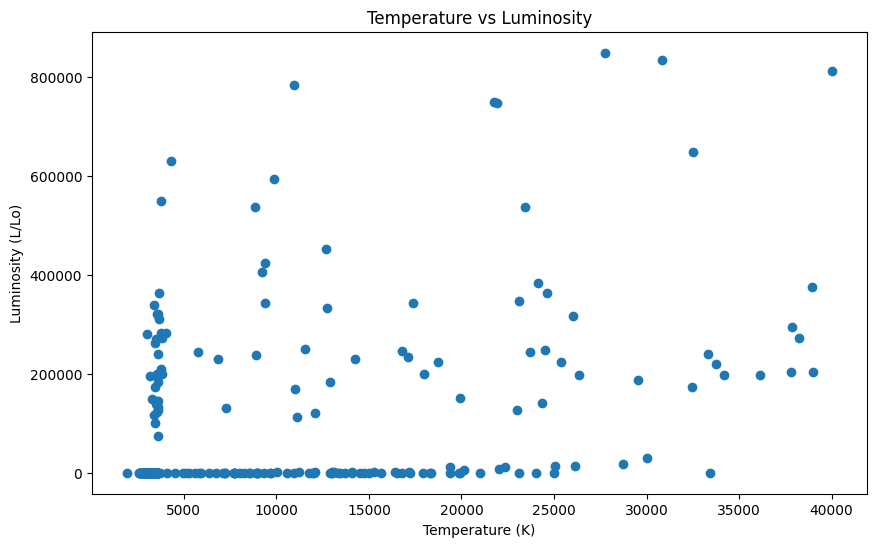

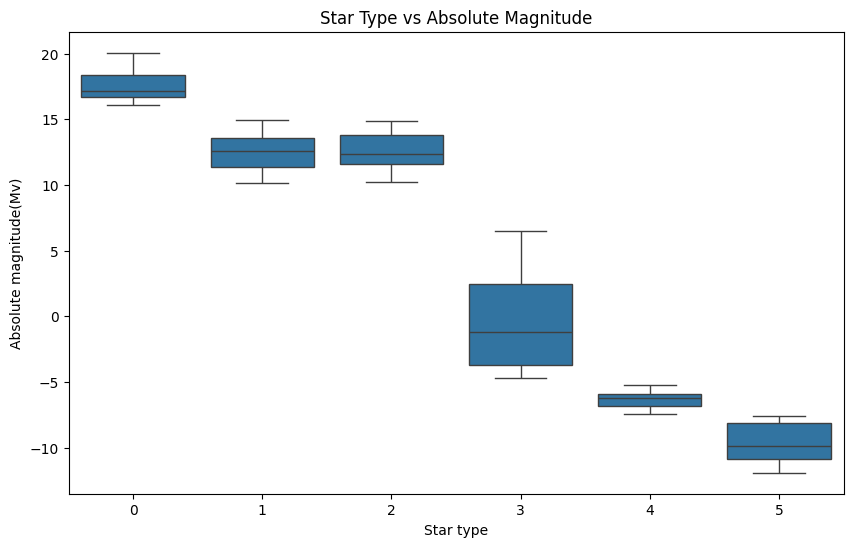

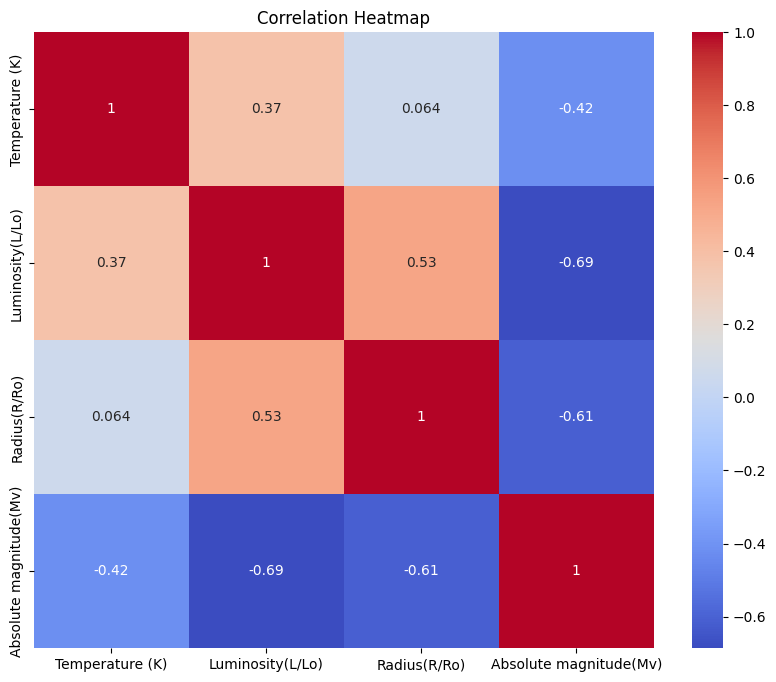

In [8]:
# Bivariate Analysis

# Scatter plot: Temperature vs Luminosity
plt.figure(figsize=(10, 6))
plt.scatter(df['Temperature (K)'], df['Luminosity(L/Lo)'])
plt.xlabel('Temperature (K)')
plt.ylabel('Luminosity (L/Lo)')
plt.title('Temperature vs Luminosity')
plt.show()

# Box plot: Star type vs Absolute magnitude
plt.figure(figsize=(10, 6))
sns.boxplot(x='Star type', y='Absolute magnitude(Mv)', data=df)
plt.title('Star Type vs Absolute Magnitude')
plt.show()

# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df[numeric_columns].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

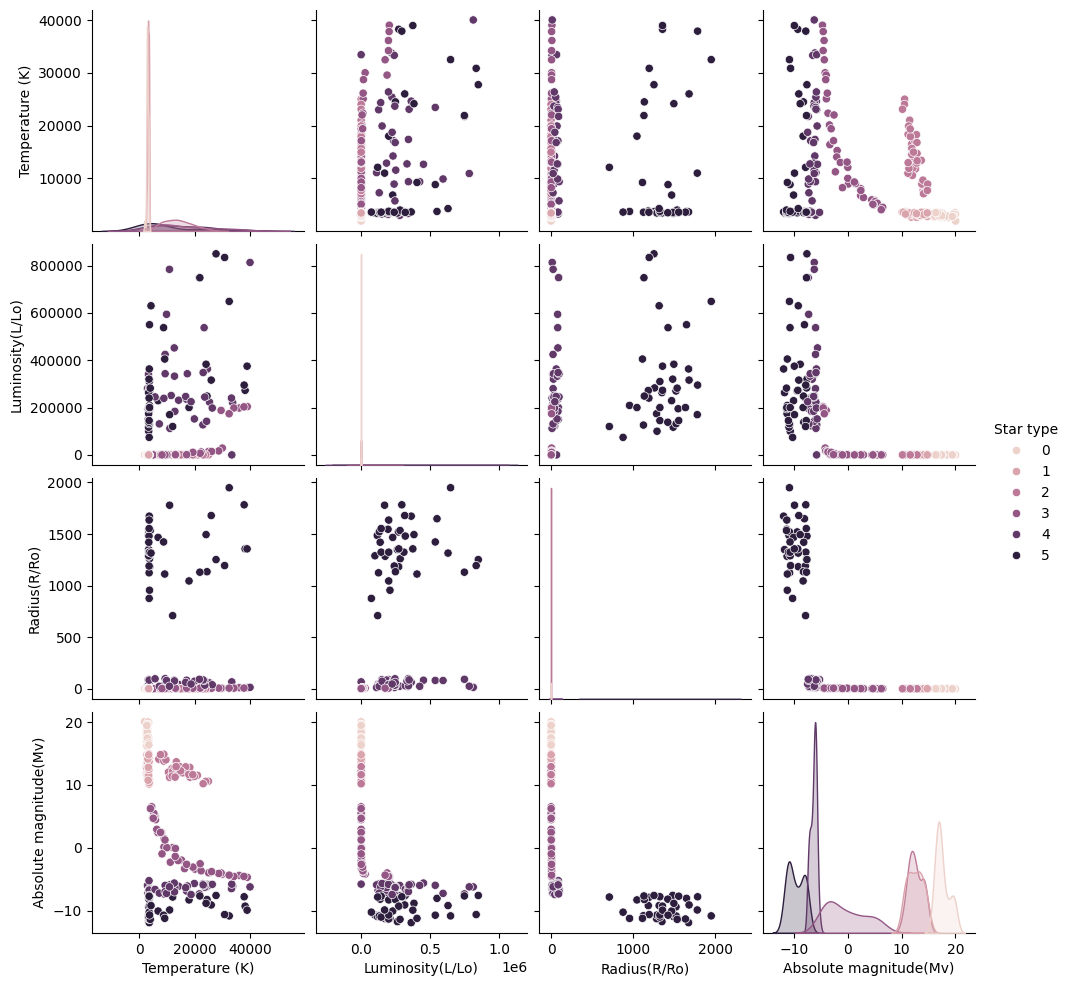

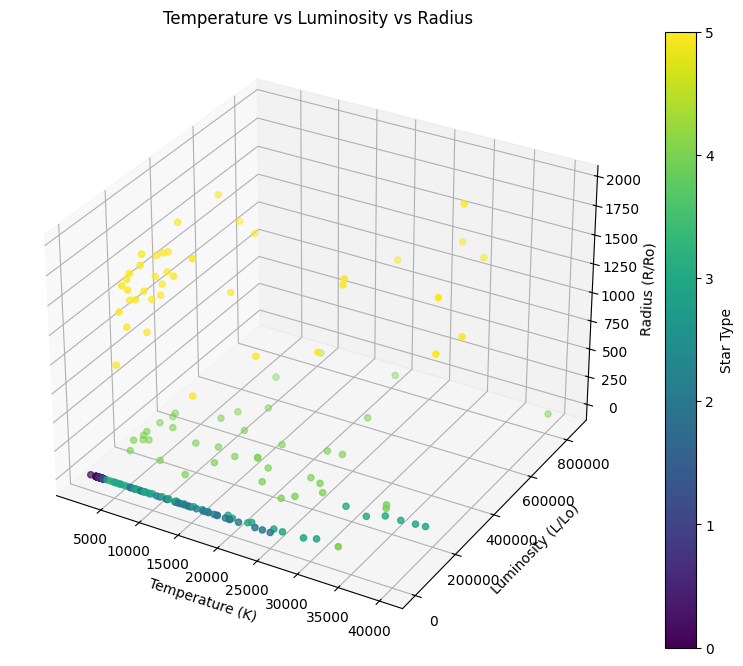

In [9]:
# Multivariate Analysis

# Pair plot
sns.pairplot(df[numeric_columns + ['Star type']], hue='Star type')
plt.show()

# 3D scatter plot
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(df['Temperature (K)'], df['Luminosity(L/Lo)'], df['Radius(R/Ro)'],
                     c=df['Star type'], cmap='viridis')
ax.set_xlabel('Temperature (K)')
ax.set_ylabel('Luminosity (L/Lo)')
ax.set_zlabel('Radius (R/Ro)')
plt.colorbar(scatter, label='Star Type')
plt.title('Temperature vs Luminosity vs Radius')
plt.show()

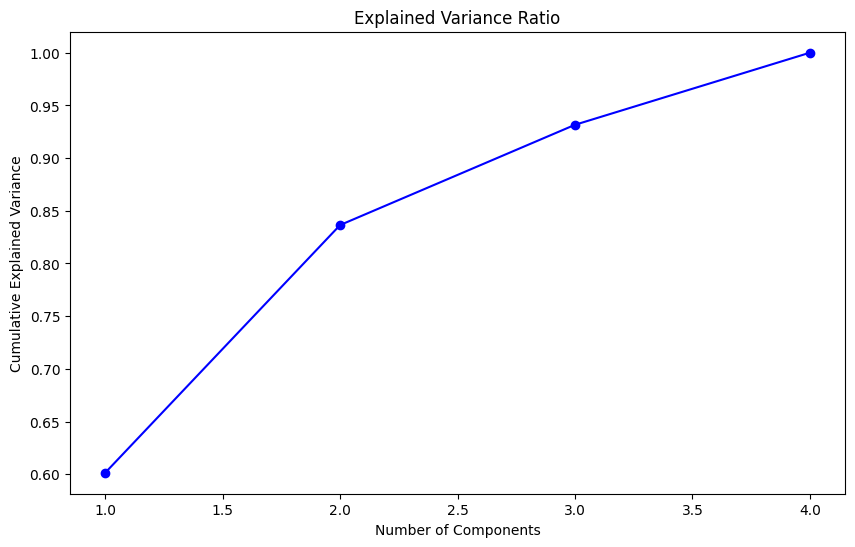

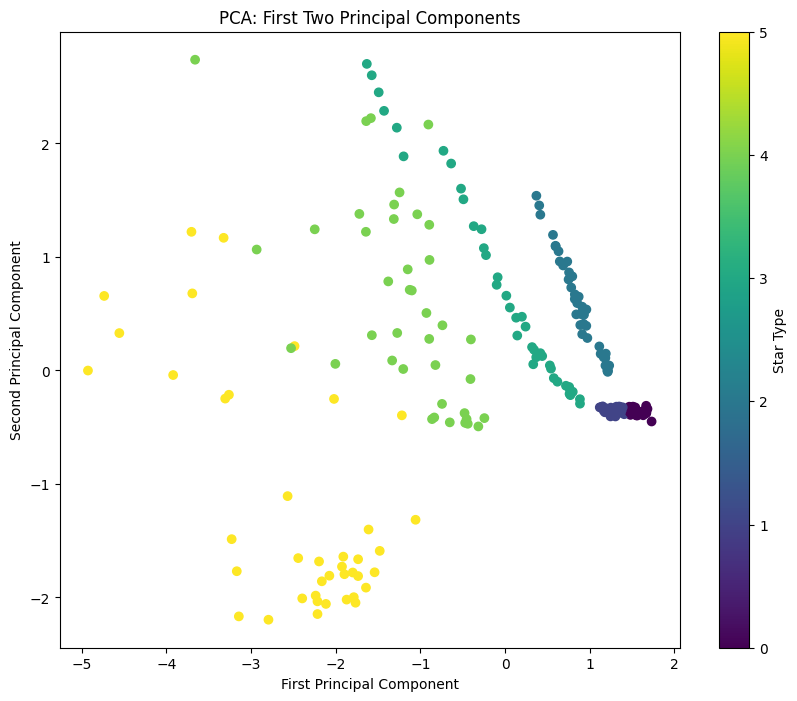

In [10]:
# Advanced Analysis: Principal Component Analysis (PCA)
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Prepare data for PCA
X = df[numeric_columns]
X_scaled = StandardScaler().fit_transform(X)

# Perform PCA
pca = PCA()
pca_result = pca.fit_transform(X_scaled)

# Plot explained variance ratio
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_.cumsum(), 'bo-')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance Ratio')
plt.show()

# Plot first two principal components
plt.figure(figsize=(10, 8))
scatter = plt.scatter(pca_result[:, 0], pca_result[:, 1], c=df['Star type'], cmap='viridis')
plt.colorbar(scatter, label='Star Type')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('PCA: First Two Principal Components')
plt.show()

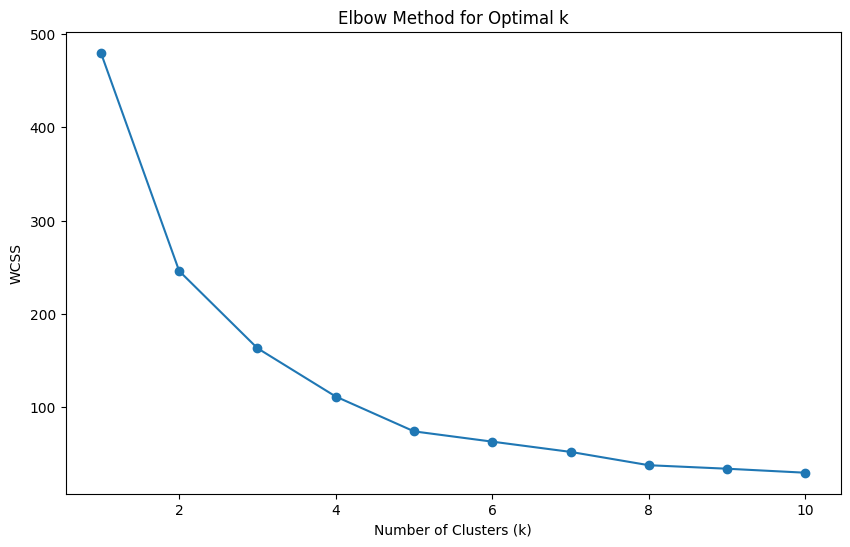

In [12]:
#K-Means Clustering
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Select features for clustering (you can choose a subset or all numeric features)
features_for_clustering = ['Temperature (K)', 'Luminosity(L/Lo)']
X = df[features_for_clustering]

# Scale the features (important for KMeans)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Elbow Method to find optimal number of clusters
wcss = []  # Within-cluster sum of squares
for i in range(1, 11):  # Test k values from 1 to 10
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)  # Inertia is the WCSS

# Plot the Elbow Method graph
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS')
plt.show()

Cluster Centers:
   Temperature (K)  Luminosity(L/Lo)
0     24736.750000     113904.211239
1      5587.429412      46318.510052
2     17371.090909     546893.545455


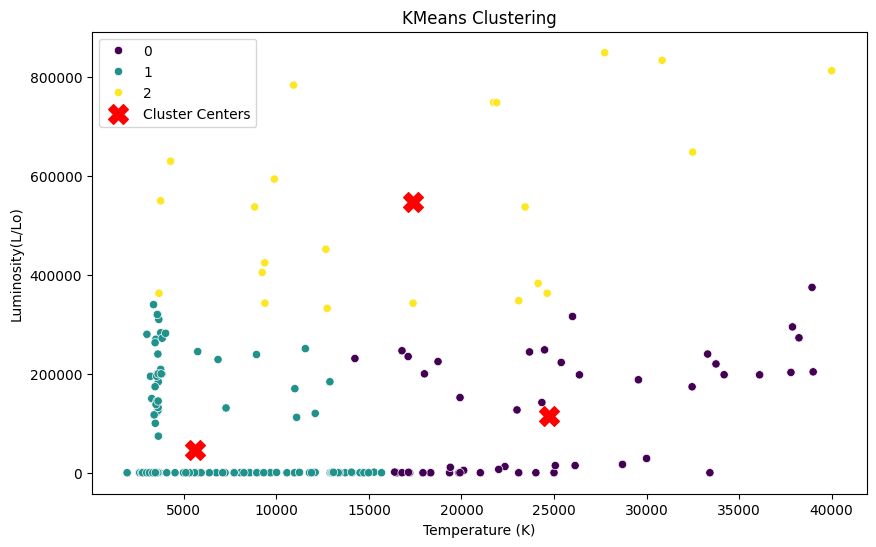

In [13]:
# Fit KMeans with the chosen k
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=42)  # Replace 3 with your chosen k
kmeans.fit(X_scaled)

# Add cluster labels to the dataframe
df['Cluster'] = kmeans.labels_

cluster_centers = scaler.inverse_transform(kmeans.cluster_centers_) # Inverse transform to get the centers in the original scale

# Create a DataFrame from the cluster centers for easier plotting/analysis
cluster_centers_df = pd.DataFrame(cluster_centers, columns=features_for_clustering)


print("Cluster Centers:")
print(cluster_centers_df)


plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['Temperature (K)'], y=df['Luminosity(L/Lo)'], hue=df['Cluster'], palette='viridis')
plt.scatter(cluster_centers_df['Temperature (K)'], cluster_centers_df['Luminosity(L/Lo)'], marker='X', s=200, color='red', label='Cluster Centers')
plt.title('KMeans Clustering')
plt.legend()
plt.show()

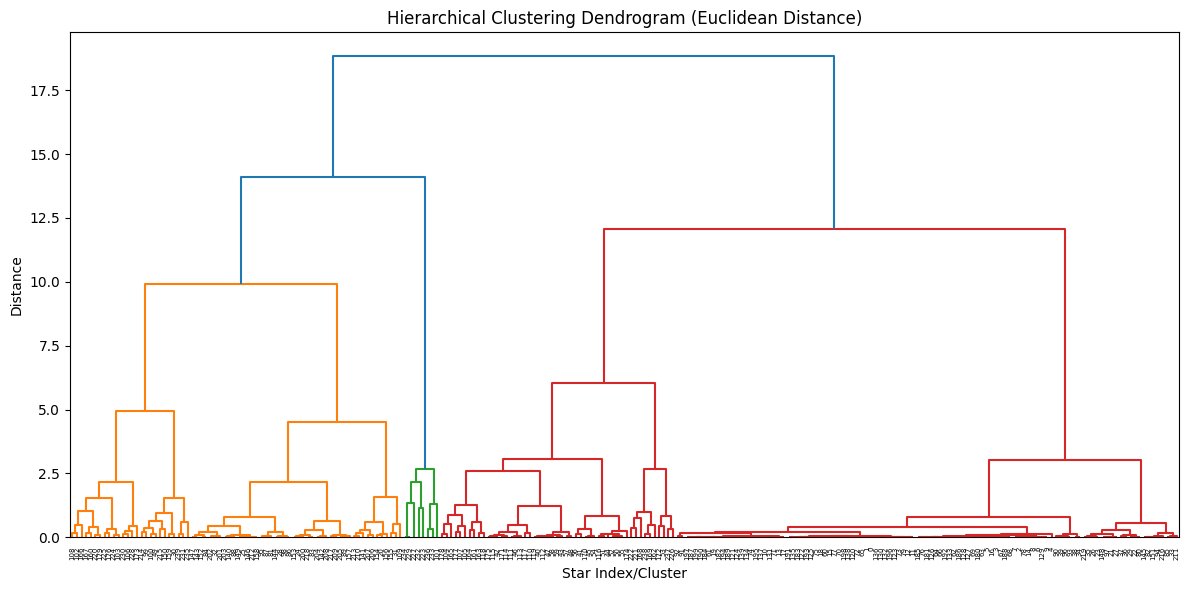

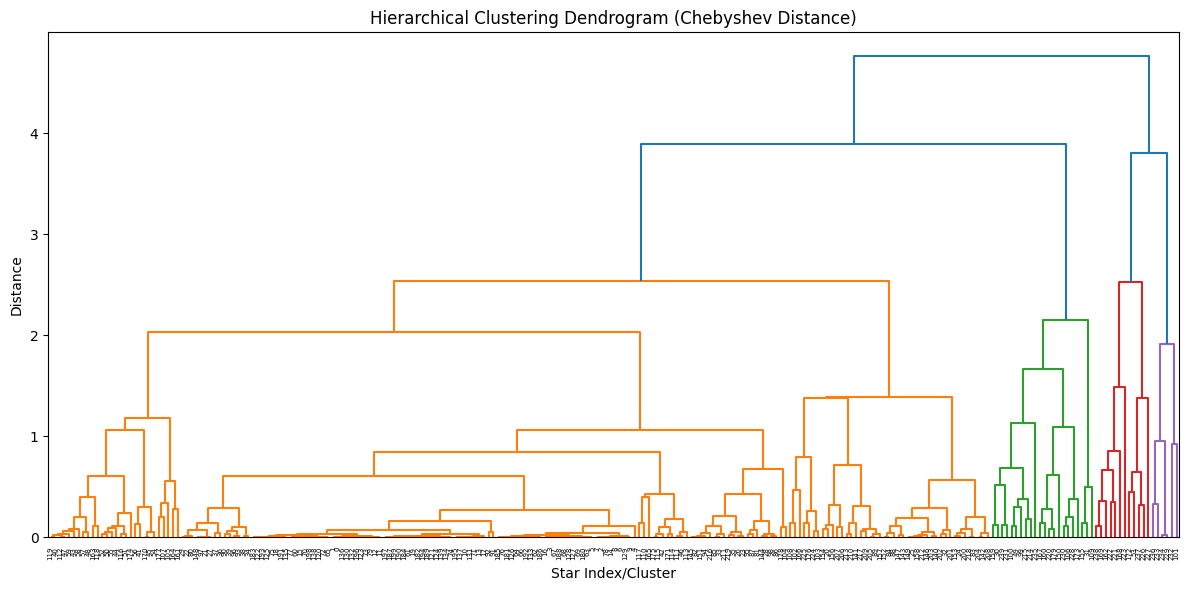

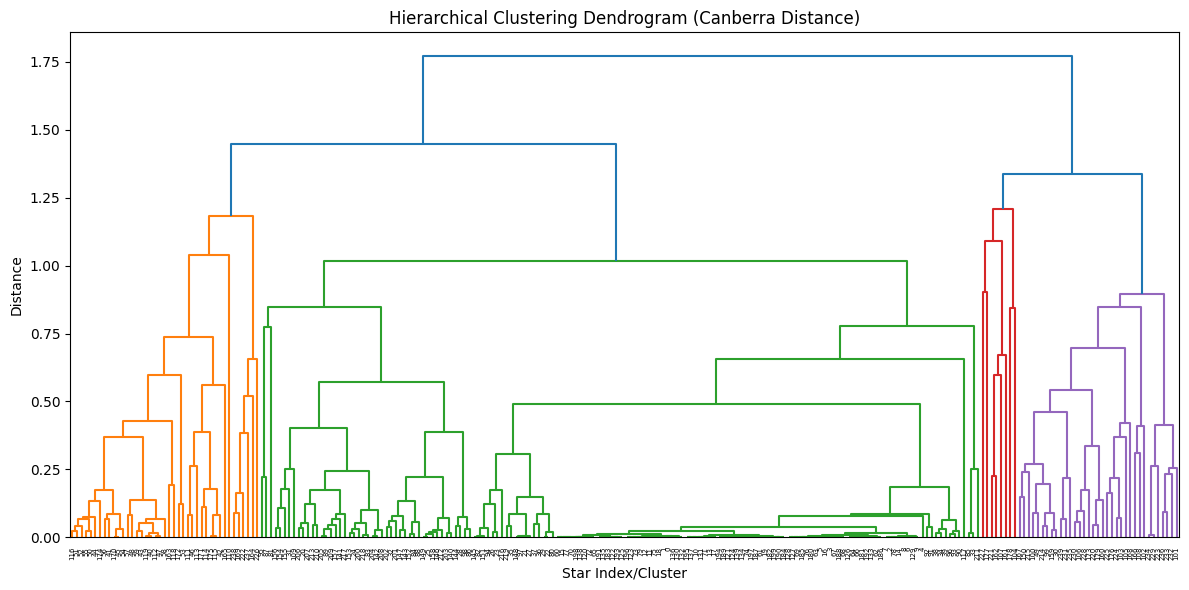

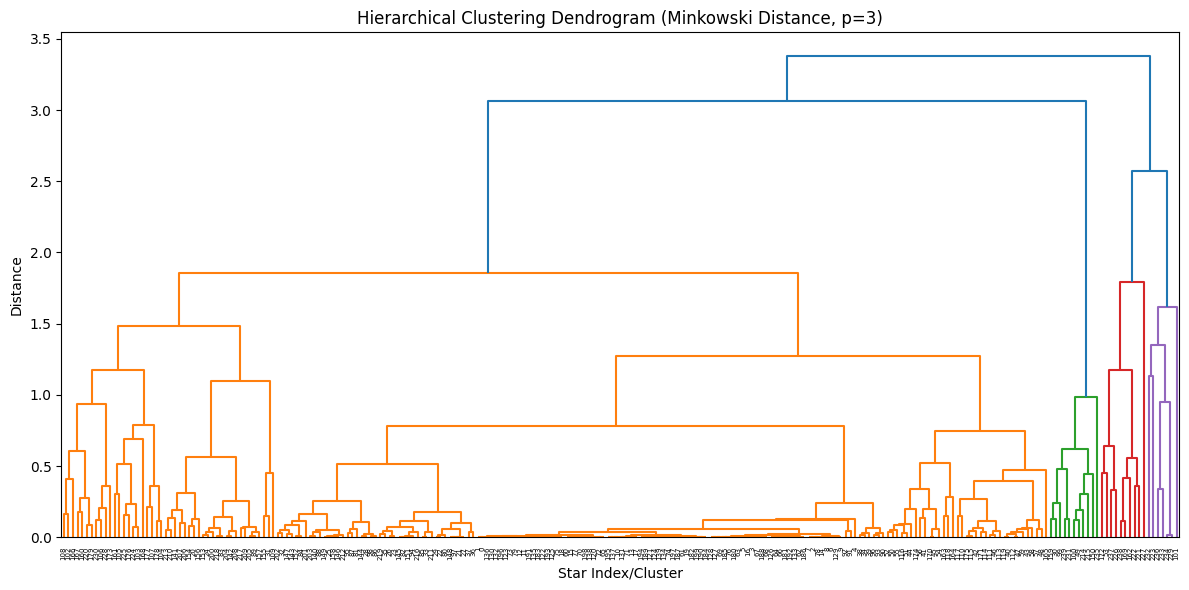

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.preprocessing import StandardScaler

features_for_clustering = ['Temperature (K)', 'Luminosity(L/Lo)']
X = df[features_for_clustering]

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Euclidean Distance
linked_euclidean = linkage(X_scaled, method='ward', metric='euclidean')
plt.figure(figsize=(12, 6))
dendrogram(linked_euclidean, orientation='top', labels=df.index, distance_sort='descending', show_leaf_counts=True)
plt.title('Hierarchical Clustering Dendrogram (Euclidean Distance)')
plt.xlabel('Star Index/Cluster')
plt.ylabel('Distance')
plt.tight_layout()
plt.show()


# # Manhattan Distance
# linked_manhattan = linkage(X_scaled, method='average', metric='manhattan')
# plt.figure(figsize=(12, 6))
# dendrogram(linked_manhattan, orientation='top', labels=df.index, distance_sort='descending', show_leaf_counts=True)
# plt.title('Hierarchical Clustering Dendrogram (Manhattan Distance)')
# plt.xlabel('Star Index/Cluster')
# plt.ylabel('Distance')
# plt.tight_layout()
# plt.show()

# Chebyshev Distance (Maximum Distance)
linked_chebyshev = linkage(X_scaled, method='complete', metric='chebyshev')
plt.figure(figsize=(12, 6))
dendrogram(linked_chebyshev, orientation='top', labels=df.index, distance_sort='descending', show_leaf_counts=True)
plt.title('Hierarchical Clustering Dendrogram (Chebyshev Distance)')
plt.xlabel('Star Index/Cluster')
plt.ylabel('Distance')
plt.tight_layout()
plt.show()


# Canberra Distance
linked_canberra = linkage(X_scaled, method='average', metric='canberra')
plt.figure(figsize=(12, 6))
dendrogram(linked_canberra, orientation='top', labels=df.index, distance_sort='descending', show_leaf_counts=True)
plt.title('Hierarchical Clustering Dendrogram (Canberra Distance)')
plt.xlabel('Star Index/Cluster')
plt.ylabel('Distance')
plt.tight_layout()
plt.show()


# Minkowski Distance
linked_minkowski = linkage(X_scaled, method='average', metric='minkowski') # p=3 here, adjust as needed
plt.figure(figsize=(12, 6))
dendrogram(linked_minkowski, orientation='top', labels=df.index, distance_sort='descending', show_leaf_counts=True)
plt.title('Hierarchical Clustering Dendrogram (Minkowski Distance, p=3)')  # Indicate the p-value
plt.xlabel('Star Index/Cluster')
plt.ylabel('Distance')
plt.tight_layout()
plt.show()